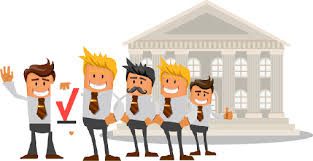

## **Problem Statement**

**This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.Analyze the dataset.**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Suressing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#import the placement data set
placement_data = pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
placement_data.head()

## **Inspecting Dataframe**

In [ ]:
#dimension of data frame
placement_data.shape

In [ ]:
#statistical aspect of dataframe
placement_data.describe()

Observation:
* Average scoring student of 10th(hsc_p) exam is 66%.
* Average scoring student of 12th(ssc_p) exam is 67%.
* Average scoring student of degree_p exam is 66%.
* Average scoring student of mba_p exam is 62%.
* Average scoring student of employeeablility test conducted in college is 72%.
* Average salary offered to students is Rs28,8,655.

In [ ]:
placement_data.info()

**Checking Null value if any**

In [ ]:
placement_data.isnull().sum()

We can see here in salary column we have found some 67 entries with null value. Lets check those values.

In [ ]:
placement_data['salary'].describe()

In [ ]:
placement_data['status'].value_counts()

In salary column from total 148 entries we found 67 null values and from place ment status we got to know that 67 were not placed. Hence we can conclude that the students who were not placed, their salary column is null value. so we can fill it with 0.

In [ ]:
placement_data['salary'].fillna("0",inplace=True)
placement_data

In [ ]:
#lets check the salary column
placement_data['salary']=placement_data['salary'].astype('float')

**Decode values**
1. Dividing 'status' column as 0 and 1.
* 0 stands for not placed.
* 1 stands for placed.

In [ ]:
#map values with 0 and 1
placement_data['status'] = placement_data['status'].replace({'Placed':1,'Not Placed':0}).astype('object')
#counting values
placement_data['status'].value_counts()

In [ ]:
#map values with 0 and 1
#placement_data['gender'] = placement_data['gender'].replace({'M':0,'F':1}).astype('object')
#counting values
placement_data['gender'].value_counts()

Here we can check that 67 students are placed and 148 students are not placed.

## **Data Visualization**

Gender vs Status

In [ ]:
placement_data['gender'].value_counts()

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
colors = ['gold','lightcoral']
explode = (0,0)
placement_data.gender.value_counts().plot.pie(explode=explode, colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('gender')
plt.subplot(1,2,2)
sns.countplot('gender',hue='status',data=placement_data)
plt.show()

Observation:
* Male students counts are higher than female students.
* Total number of Male students are 139 and female students are 76.
* Where 100 male students & 48 female students are placed.
* Rest students are not placed.

**Gender Vs Salary**

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='gender',y='salary',data=placement_data)
plt.subplot(1,2,2)
sns.barplot(x='gender',y='salary',data=placement_data)

plt.show()

**Observation:**
* We can observe that male(M) students are having higher salary than female(F).
* The salary range of male student median is approx 2.5 lacks per annum.
* The salary range of female student median is approx 2.1 lacks per annum.
* The highest salary of male student is aprrox 10 lakhs per annum.
* The highest salary of female student is approx 7 lakhs per annum.


### **SSC board with salary and status**

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='salary',y='ssc_b',data=placement_data)
plt.subplot(1,2,2)
sns.countplot(x='status',hue='ssc_b',data=placement_data)

plt.show()

Observation:

* From above Box plot we observe central board students have highest package from other board of ssc_b(10th).
* Maximum students are having very good package from central board in 10th.
* From above countplot we observed that from central board, the students are more placed than other board.

### **HSC board with salary and status**

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='salary',y='hsc_b',data=placement_data)
plt.subplot(1,2,2)
sns.countplot(x='status',hue='hsc_b',data=placement_data)

plt.show()

Observation:
* From above boxplot we observed, central board students median salary is 2.5 lakhs.
* Other board students median salary is little less around 2.4 lakhs.
* The highest salary is from central hsc board is around 10 lakhs.
* If we are talking abount placing status, then other board from hsc are more placed than central board.

### **Degree with salary and status**

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot(x='salary',y='degree_t',data=placement_data)
plt.subplot(1,2,2)
sns.countplot(x='status',hue='degree_t',data=placement_data)

plt.show()

Observation:
* From above violin plot, we observe that commerce & management are having highest salary offered.
* Comm & mgmt student are highly placed as compare to science&tech and other degrees.

### **Mba specialization with salary & placement**

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='salary',y='specialisation',data=placement_data)
plt.subplot(1,2,2)
sns.countplot(x='status',hue='specialisation',data=placement_data)

plt.show()

Observation:
* Marketing & finacnce combination students are highly placed from MBA speacializaton.
* They have highest salary around 10 lakhs.
* For marketing and finance specialization placed stdents having lowest salary is around 2 lakhs.
* where as mkt&HR median salary is around 2.2 lakhs.

### **Students of 10th and 12th marks status**

In [ ]:
#findout pearson correlation between 10th & 12th marks student.

from scipy.stats import pearsonr
corr,_ = pearsonr(placement_data['ssc_p'], placement_data['hsc_p'])
print('pearsons correlation: %.3f' % corr)
sns.regplot(x='ssc_p',y='hsc_p',data=placement_data)

Observation:
* Correlation between 12th marks & 10th marks student is 0.511, which is not so good. 
* They are not strongly correlated to each other.
* We can observe that the students are performed good in 10th also performed well in 12th.
* There are few outliers present in this plot, where students are less than 60% in 10th as well as 12th.
* There are some students, who scored less in 10th,but scored very good in 12th.

### **Numerical column analysis**

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(placement_data)
plt.show()

### **Heatmap**

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(placement_data.corr(),annot=True)

Observation:
* There is no correlation, which shows very strong.
* But there are few variables, whose correlation are good enough.
* ssc_p, hsc_p, degree_p, salary variables are well correlated.

### **Placed student status**

In [ ]:
plt.figure(figsize=(10,10))


sns.catplot(x='status',y='ssc_p',hue='gender',kind='swarm', data=placement_data)
sns.catplot(x='status', y='hsc_p', hue='gender', kind='swarm', data=placement_data)
sns.catplot(x='status', y='degree_p', hue='gender',kind='swarm', data=placement_data)

plt.show()

Observation:
* Most students, who are scored less than 60%, are not placed.
* In 10th females are not placed, who has scored less than 60%.
* The students both male & female, are placed who has scored more than 60%

## **Data Preparation**

### **Convert Categorical variable to numerical**

1. One-hot encoder
2. label encoder

1. One-hot encoder

In [ ]:
#creating dummy variable for some categorical column and dropping the first one.
dummy1 = pd.get_dummies(placement_data[['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation',]],drop_first=True)

#adding result to master data frame
placement_data = pd.concat([placement_data,dummy1],axis=1)


In [ ]:
#now check the dataframe
placement_data.head()

2. Label encoder:

-As we have done earlier, label encoding for status, changed to 0 and 1.

In [ ]:
# For status, we would change the data type to int from object.

placement_data['status'] = placement_data['status'].astype('int')
placement_data['status'].value_counts()

In [ ]:
#In our analysis there is no use of salary, hence dropping it.

placement_data.drop(['salary'],axis=1,inplace=True)
placement_data.head()

In [ ]:
#Dropping all other repeated column

placement_data.drop(['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'],axis=1,inplace=True)
placement_data.head()

In [ ]:
#dropping serial number too.
placement_data.drop(['sl_no'],axis=1,inplace=True)

Hence our final data set for prediction would be as follows.

In [ ]:
placement_data.head()

In [ ]:
print('Final shape of data:', placement_data.shape)
print('\n Final column of data:\n',placement_data.columns)

Final data(X & y)

In [ ]:
X = placement_data.loc[:,['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'gender_M',
       'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce', 'hsc_s_Science',
       'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR']]
y= placement_data.loc[:,['status']]

In [ ]:
#plot heatmap

plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')
plt.show()

### **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_test_pred = logreg.predict(X_test)

**Confusion Metrics**

In [ ]:
from sklearn import metrics

#confusion metrics
confusion = metrics.confusion_matrix(y_test,y_test_pred)
print(confusion)

In [ ]:
#plot confusion matrix

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_test_pred)


**Accuracy score**

In [ ]:
print('Logistic model accuracy score:',metrics.accuracy_score(y_test,y_test_pred))

Our model is pretty good, as the accuracy score is 84%.

## **Metrics beyond simple accuracy**

In [ ]:
TP = confusion[1,1] #True Positive
TN = confusion[0,0] #True negative
FP = confusion[0,1] #False Positive
FN = confusion[1,0] #False negative

In [ ]:
#sensitivity

TP/float(TP+FN)

In [ ]:
#specificity

TN/float(TN+FP)

In [ ]:
#false positive rate

FP/float(FP+TN)

In [ ]:
#positive predicted value

TP/float(TP+FP)

In [ ]:
#negative predicted value

TN/float(TN+FN)

Precision & recall tradeoff

**Precision**

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

**Recall**

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

## **ROC Curve**

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve(area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
probs = logreg.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, thresholds = metrics.roc_curve( y_test, preds, drop_intermediate = False )
draw_roc(y_test, preds)

## **Conclusion**

* Our model is pretty good with the accuracy model of 84%.
* ROC curve area 0.92.
* Other than accuracy some other scores are given below:
      sensitivity score/Recall:90.4%
      specificity score :73.9%
      Precision score : 86.3%
* From our analysis, we observed that the students from 10th central board, 12th other board are mostly placed.
* Yes percentage matters for placing in a company, the students who scored above 60% in every board with degree , he/she got placed.
* Commerce with management specialization in degree and marketing with finacnce specialization in MBA are most demanded by corporate people.

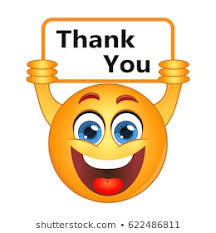